In [2]:
# ..::bibliotecas::..

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle 
from tqdm import tqdm

In [3]:
# C A R G A   E X P E R I M E N T O
name = "E:\\MEA_data\\20230622\\datamanager\\Rebanada02\\OPTOa_SPK_edit2.pckl"
charge_pckl = open(name,'rb') 
exp= pickle.load(charge_pckl)
charge_pckl.close()

Lista de electrodos a los que se les va a sacar un template:

* C4
* C5
* L6
* L8

# Cálculo de promedios

In [36]:
all_temp = {}

#e = 'D8'
electrodes = ['C4', 'C5', 'L6', 'L8']
for e in electrodes:
    segments = {}
    templates = {}
    ts = {}
    num_cl = list(set(exp[e]['clusters']))
    #for cl in num_cl:
    #    templates[cl] = np.array([])
    for i in range(0, len(exp[e]['clusters'])):
        key = exp[e]['clusters'][i]
        if key in segments and key >= 0:
            segments[key] = np.concatenate((segments[key], 
                            np.array([exp[e]['segments'][i]])),
                            axis = 0)
            ts[key] = np.concatenate((ts[key], 
                            np.array([exp[e]['ts'][i]])),
                            axis = 0)
        elif key >= 0:
            segments[key] = np.array([exp[e]['segments'][i]])
            ts[key] = np.array([exp[e]['ts'][i]])

    for key in segments.keys():
        templates[key] = np.mean(segments[key], axis =0)

    print("{} Clusters distintos: {}".format(e, templates.keys()))
    all_temp[e] = {'seg':segments,
                   'ts': ts, 
                   'tem':templates}

C4 Clusters distintos: dict_keys([0])
C5 Clusters distintos: dict_keys([0])
L6 Clusters distintos: dict_keys([0])
L8 Clusters distintos: dict_keys([0])


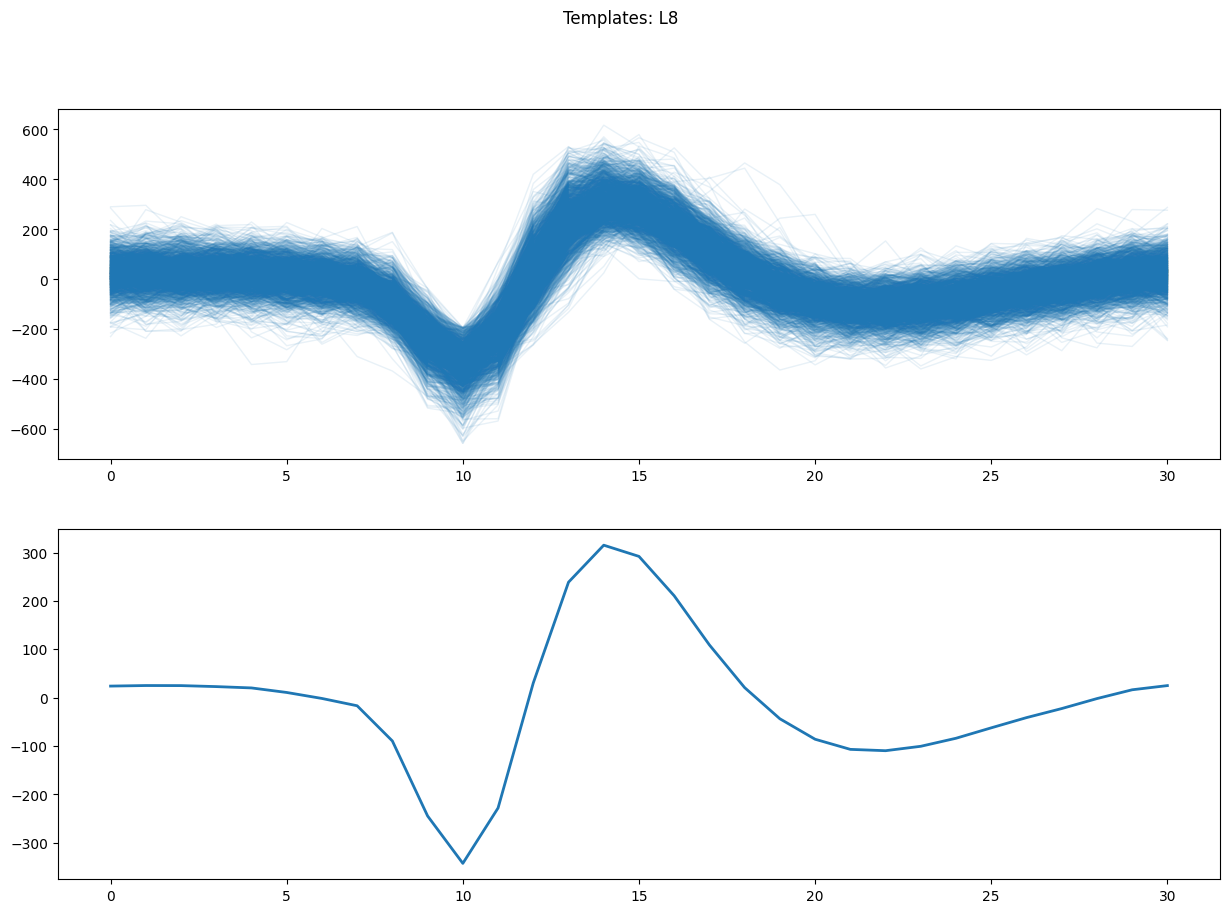

<Figure size 1500x500 with 0 Axes>

In [41]:
colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# x = np.array([np.arange(0,31)])
# x = np.repeat(x, len(templates[0]), axis=0)
# print(len(x[0]))
e = 'L8'
electrode = all_temp[e]

fig, axs = plt.subplots(2, figsize=(15,10), gridspec_kw={'height_ratios': [1, 1]})
fig.suptitle("Templates: {}".format(e))

plt.figure(figsize=[15,5])
for key in templates.keys():
    axs[0].plot(electrode['seg'][key].T, 
                color = colores[key], 
                linewidth=1, 
                alpha =0.1)
    axs[1].plot(electrode['tem'][key], 
                color = colores[key], 
                linewidth = 2, 
                alpha = 1)
    #plt.plot(templates[key].T, color = colores[key], linewidth=1, alpha =0.25)
    #plt.plot(np.mean(templates[key], axis =0), color = colores[key], linewidth=2, alpha =0.7)

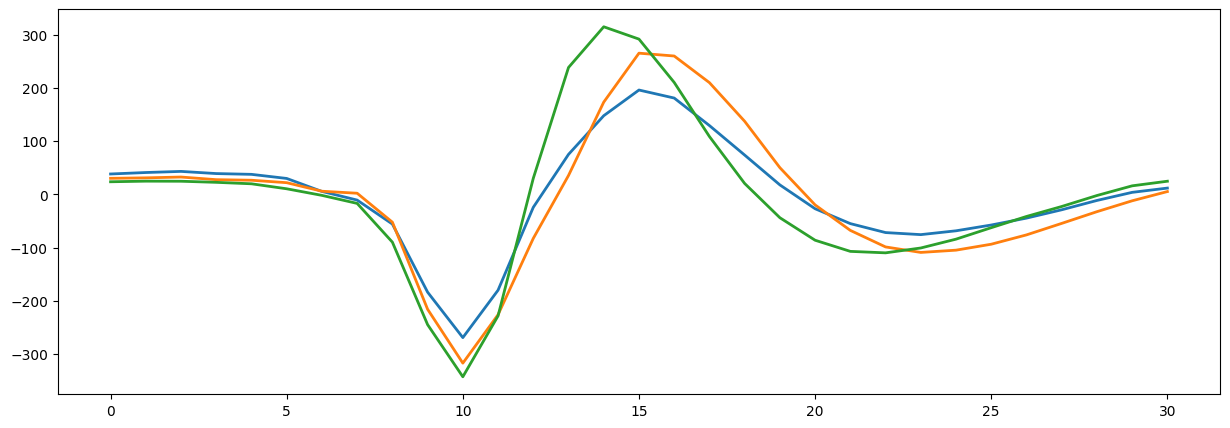

In [92]:
temp_list = []

plt.figure(figsize = [15,5])
for key in all_temp.keys():
    if not(key == 'C5'):
        for cluster in all_temp[key]['tem']:
            plt.plot(all_temp[key]['tem'][cluster],
                     linewidth = 2,
                     alpha = 1)
            temp_list.append(all_temp[key]['tem'][cluster])

In [51]:
np.corrcoef(temp_list)

array([[1.        , 0.87591172, 0.98147997, 0.94427368],
       [0.87591172, 1.        , 0.79686166, 0.94013351],
       [0.98147997, 0.79686166, 1.        , 0.88895581],
       [0.94427368, 0.94013351, 0.88895581, 1.        ]])

In [88]:
'''for key in all_temp.keys():
    for cluster in all_temp[key]['tem']:
        temp_list.append(all_temp[key]['tem'][cluster])'''
arr = np.array([])
conde = 0
index = []
for key in all_temp.keys():
    print(key)
    print(len(all_temp[key]['seg'][0]))
    print(type(all_temp[key]['seg'][0]))
    if arr.size == 0:
        arr = all_temp[key]['seg'][0]
        index = [conde]*len(all_temp[key]['seg'][0])
    else:
        arr = np.concatenate((arr, all_temp[key]['seg'][0]), axis = 0)
        index.extend([conde]*len(all_temp[key]['seg'][0]))
    conde += 1

C4
1063
<class 'numpy.ndarray'>
C5
2197
<class 'numpy.ndarray'>
L6
2851
<class 'numpy.ndarray'>
L8
1620
<class 'numpy.ndarray'>


In [89]:
len(index)

7731

In [83]:
index = [3]*3
index.extend([1]*3)
index

[3, 3, 3, 1, 1, 1]

In [63]:
from utiles import spike_reducer

In [65]:
# . . : : U M A P : : . .

reduced_spikes = spike_reducer(arr, v_neighbors = 35, random_state = 18)
spike_embedding = reduced_spikes.embedding_
#clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
#clusterer.fit(spike_embedding)

In [67]:
len(spike_embedding)

7731

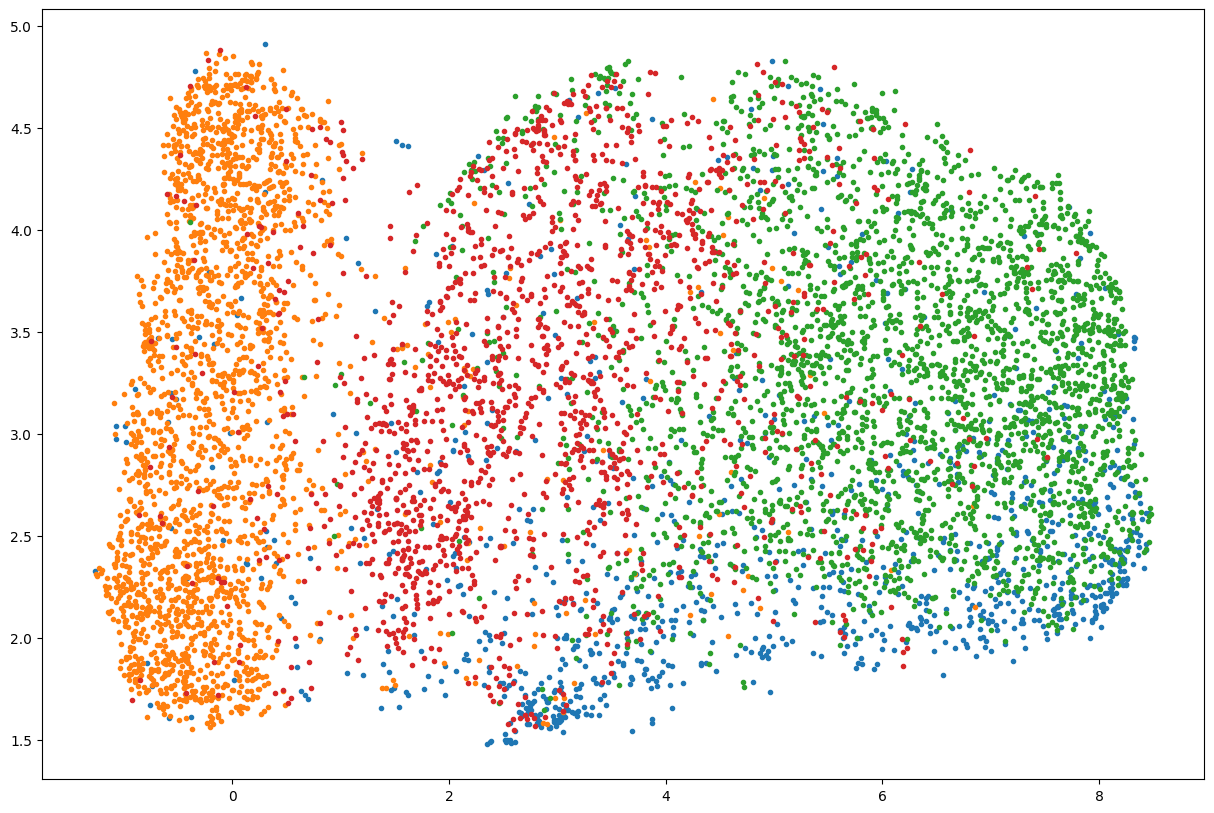

In [91]:
plt.figure(figsize = [15,10])
for i in range(0, len(spike_embedding)):
    #plt.plot(spike_embedding[i][0], spike_embedding[i][1], marker = 'o', color = colores[index[i]])
    plt.plot(spike_embedding[i][0], spike_embedding[i][1], marker = '.', color = colores[index[i]])

In [70]:
index[1]

'C5'